In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

%matplotlib inline

## To check if the toolbox is working properly, classic Cart-Pole problem is considered.
## RL agent is trained to balance a pole on a cart as long as possible.

In [3]:
figsize(9,6)

def print_exec_time_summary(df_ep_ls, df_ex_ts):
    n_steps_in_exp = df_ep_ls.sum(axis=0).values
    t_per_step = df_ex_ts[0].values / n_steps_in_exp
    tot_ex_t = df_ex_ts.values.sum()
    tot_n_steps = n_steps_in_exp.sum()
    avg_per_step = tot_ex_t / tot_n_steps
    print("Time per simulation step in each experiment: {} s".format(t_per_step))
    print("Mean time per simulation step: {:.3f} s, std: {:.3f} s".format(t_per_step.mean(), t_per_step.std()))
    print("Total execution time: {:.3f} s for {} steps -> {:.3f} s per step". format(tot_ex_t, tot_n_steps, avg_per_step))
    
def plot_ep_lens(df, title_spec, n_runs=5):
    transformed = df.rolling(window=20, min_periods=20, axis=0).mean()[19:]
    transformed['avg'] = transformed.mean(axis=1)
    plt.plot(transformed.index, transformed[list(range(n_runs))], 'gray', 
             alpha=0.5)
    plt.plot(transformed.index, transformed['avg'], 'red', label="Average episode length")
    plt.title("Episodes lenghts vs training time. {}".format(title_spec))
    plt.xlabel("# of episode")
    plt.ylabel("Episode length")
    plt.legend()
    print("Last episode performance: {:.2f}".format(transformed['avg'].iloc[-1]))
    return transformed['avg']

# 1. Various force magnitude experiment
To investigate system behaviour 3 values of force magnitude were considered:
* `small` - force magnitude is significantly smaller than mass of a cart. 5 N
* `moderate` - force magnitude is slightly bigger than mass of a cart. 11 N
* `big` - force magnitude is significantly bigger than mass of a cart. 17 N

For each value 5 experiments with the following parameter were done:
* n_episodes = 100 - number of episodes to perform in each experiment run.
* force - magnitude to be applied during experiment at each time step.
* m_trolley = 10 - mass of a cart.
* m_load = 1 - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole relative to positive X-axis direction at experiment start.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = 0.05 s - time difference between simulation steps.
* positive_reward = 1 - positive reward for RL agent.
* negative_reward = -100 - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [4]:
figsize(9,6)

In [5]:
df_bin_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_True_CS_episodes_lengths.csv", header=None)
df_bin_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_True_CS_exec_times.csv", header=None)
df_nobin_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_False_CS_episodes_lengths.csv", header=None)
df_nobin_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_False_CS_exec_times.csv", header=None)
df_nobin_200ep_ep_ls = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_nobin_200ep_ex_ts = pd.read_csv("./experiment_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
df_nobin_64_ep_ls = pd.read_csv("./experiment_n4_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_nobin_64_ex_ts = pd.read_csv("./experiment_n4_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)

### Let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Last episode performance: 10.71
Time per simulation step in each experiment: [0.03019662 0.03352614 0.02950301 0.03514246 0.03053309] s
Mean time per simulation step: 0.032 s, std: 0.002 s
Total execution time: 174.751 s for 5481 steps -> 0.032 s per step


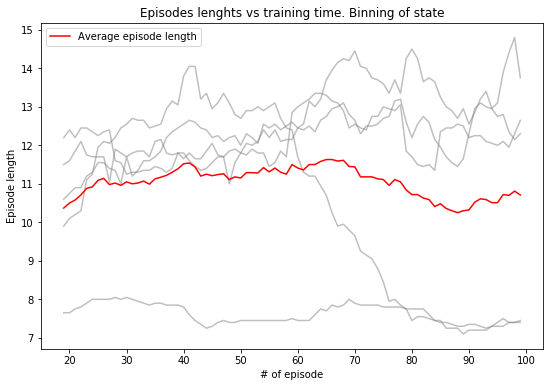

In [6]:
binning_eps_smoothed = plot_ep_lens(df_bin_f_ep_ls, "Binning of state")
print_exec_time_summary(df_bin_f_ep_ls, df_bin_f_ex_ts)

Time per simulation step in each experiment: [0.03035634 0.03490155 0.03416732 0.03101433 0.03594651] s
Mean time per simulation step: 0.033 s, std: 0.002 s
Total execution time: 170.603 s for 5171 steps -> 0.033 s per step
Last episode performance: 11.52


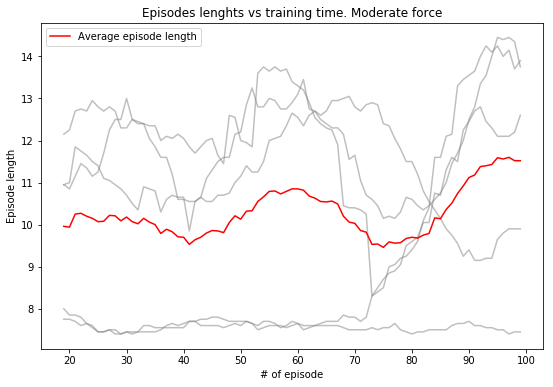

In [7]:
print_exec_time_summary(df_nobin_f_ep_ls, df_nobin_f_ex_ts)
nobin_eps_smoothed = plot_ep_lens(df_nobin_f_ep_ls, "Moderate force")

Last episode performance: 17.56
Time per simulation step in each experiment: [0.02518986 0.0276798  0.02354942 0.02451311 0.0239869 ] s
Mean time per simulation step: 0.025 s, std: 0.001 s
Total execution time: 398.976 s for 15966 steps -> 0.025 s per step


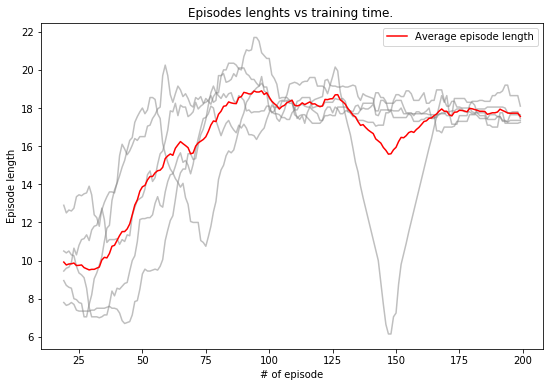

In [8]:
_200ep_smoothed = plot_ep_lens(df_nobin_200ep_ep_ls, "")
print_exec_time_summary(df_nobin_200ep_ep_ls, df_nobin_200ep_ex_ts)

Last episode performance: 17.62
Time per simulation step in each experiment: [0.02042614 0.02186082 0.02391004 0.02729951 0.02753852] s
Mean time per simulation step: 0.024 s, std: 0.003 s
Total execution time: 361.104 s for 15064 steps -> 0.024 s per step


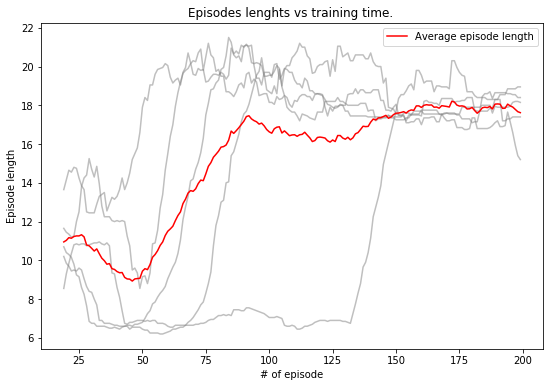

In [9]:
more_neurons_smoothed = plot_ep_lens(df_nobin_64_ep_ls, "")
print_exec_time_summary(df_nobin_64_ep_ls, df_nobin_64_ex_ts)

Last episode performance: 23.32
Time per simulation step in each experiment: [0.02149454 0.02250919 0.02322852 0.02495448 0.02430817] s
Mean time per simulation step: 0.023 s, std: 0.001 s
Total execution time: 415.803 s for 17755 steps -> 0.023 s per step


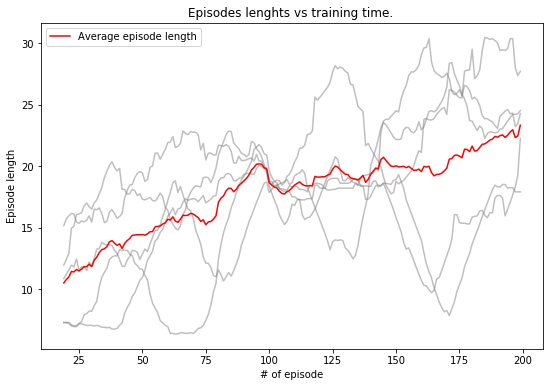

In [10]:
df_nobin_64_ep_ls = pd.read_csv("./experiment_n5_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_nobin_64_ex_ts = pd.read_csv("./experiment_n5_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_nobin_64_ep_ls, "")
print_exec_time_summary(df_nobin_64_ep_ls, df_nobin_64_ex_ts)

Last episode performance: 36.24
Time per simulation step in each experiment: [0.02482533 0.0247762  0.02577587 0.02652396 0.02611314] s
Mean time per simulation step: 0.026 s, std: 0.001 s
Total execution time: 557.208 s for 21684 steps -> 0.026 s per step


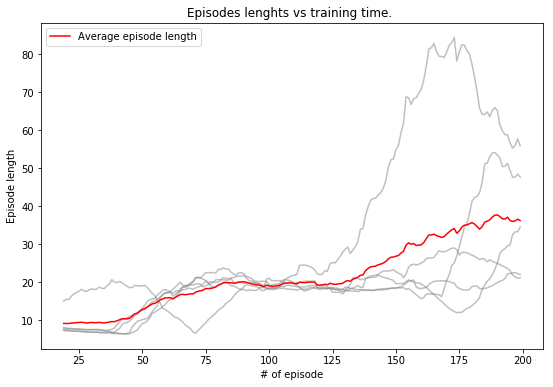

In [11]:
df_nobin_64_ep_ls = pd.read_csv("./experiment_n6_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_nobin_64_ex_ts = pd.read_csv("./experiment_n6_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_nobin_64_ep_ls, "")
print_exec_time_summary(df_nobin_64_ep_ls, df_nobin_64_ex_ts)

Last episode performance: 20.00
Time per simulation step in each experiment: [0.02334964 0.02254256 0.02367151 0.02239958 0.02363995] s
Mean time per simulation step: 0.023 s, std: 0.001 s
Total execution time: 309.875 s for 13403 steps -> 0.023 s per step


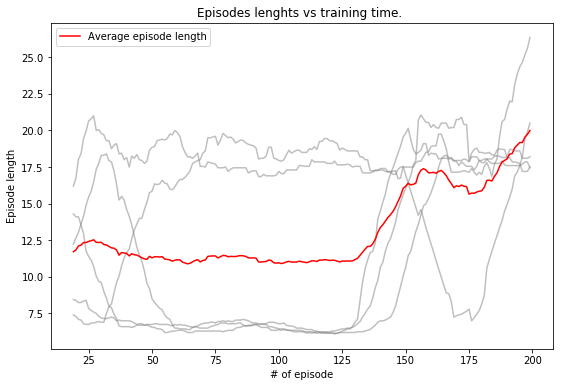

In [12]:
df_ep_ls = pd.read_csv("./experiment_n7_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n7_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 24.73
Time per simulation step in each experiment: [0.02173571 0.02542837 0.0269182  0.02544083 0.02433179] s
Mean time per simulation step: 0.025 s, std: 0.002 s
Total execution time: 483.938 s for 19518 steps -> 0.025 s per step


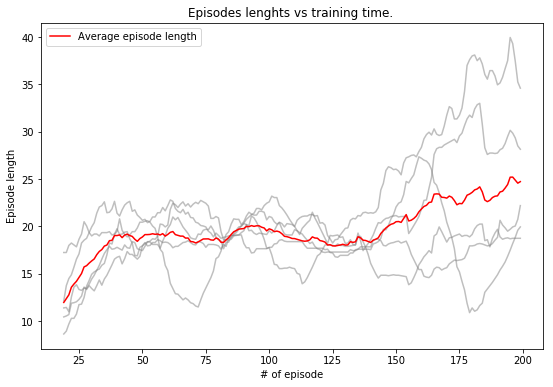

In [13]:
df_ep_ls = pd.read_csv("./experiment_n8_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n8_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 19.07
Time per simulation step in each experiment: [0.02357205 0.02645194 0.02542466 0.02715646 0.02787111] s
Mean time per simulation step: 0.026 s, std: 0.001 s
Total execution time: 440.815 s for 16904 steps -> 0.026 s per step


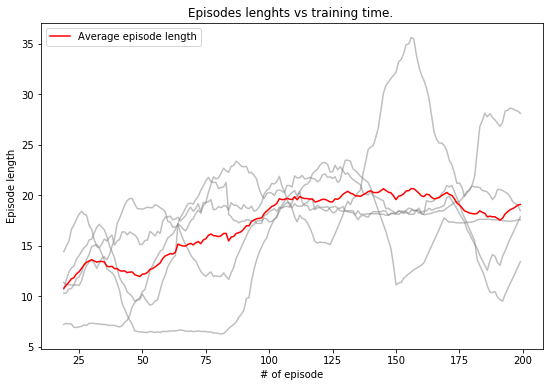

In [14]:
df_ep_ls = pd.read_csv("./experiment_n9_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n9_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 26.15
Time per simulation step in each experiment: [0.02207774 0.02853512 0.02750932 0.02799202 0.02615852] s
Mean time per simulation step: 0.026 s, std: 0.002 s
Total execution time: 447.981 s for 17069 steps -> 0.026 s per step


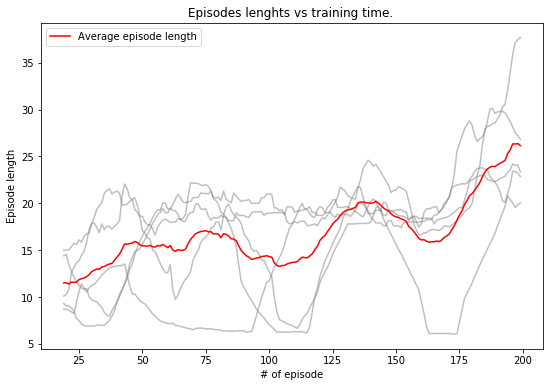

In [15]:
df_ep_ls = pd.read_csv("./experiment_n10_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n10_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 20.86
Time per simulation step in each experiment: [0.02546321 0.03432952 0.02896942 0.0222128  0.02228716] s
Mean time per simulation step: 0.027 s, std: 0.005 s
Total execution time: 443.123 s for 16750 steps -> 0.026 s per step


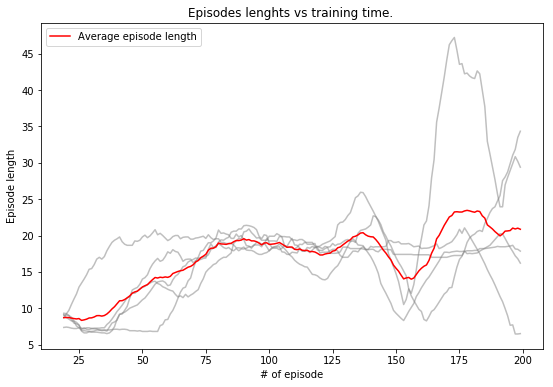

In [16]:
df_ep_ls = pd.read_csv("./experiment_n11_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n11_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 23.81
Time per simulation step in each experiment: [0.02235257 0.02337624 0.0232858  0.02449876 0.02384767] s
Mean time per simulation step: 0.023 s, std: 0.001 s
Total execution time: 474.019 s for 20254 steps -> 0.023 s per step


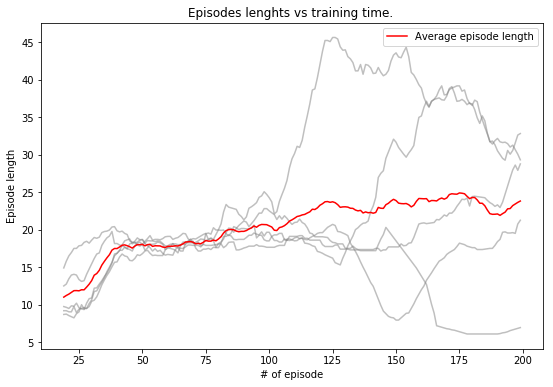

In [17]:
df_ep_ls = pd.read_csv("./experiment_n12_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n12_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 24.10
Time per simulation step in each experiment: [0.02021478 0.02297485 0.0238193  0.02269615 0.02304848] s
Mean time per simulation step: 0.023 s, std: 0.001 s
Total execution time: 450.655 s for 19921 steps -> 0.023 s per step


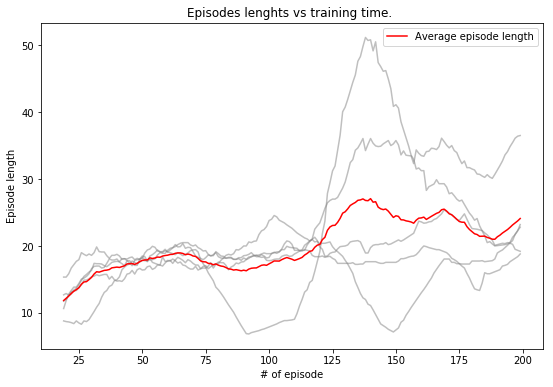

In [18]:
df_ep_ls = pd.read_csv("./experiment_n13_5_200_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n13_5_200_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 37.08
Time per simulation step in each experiment: [0.02191406 0.0214003  0.0203718  0.02249725 0.02234362] s
Mean time per simulation step: 0.022 s, std: 0.001 s
Total execution time: 3652.605 s for 167165 steps -> 0.022 s per step


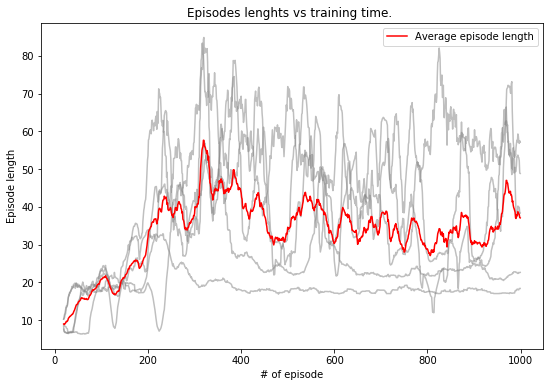

In [19]:
df_ep_ls = pd.read_csv("./experiment_n14_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n14_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 31.96
Time per simulation step in each experiment: [0.02334714 0.02459842 0.02625913 0.02401689 0.02539195] s
Mean time per simulation step: 0.025 s, std: 0.001 s
Total execution time: 4648.615 s for 187093 steps -> 0.025 s per step


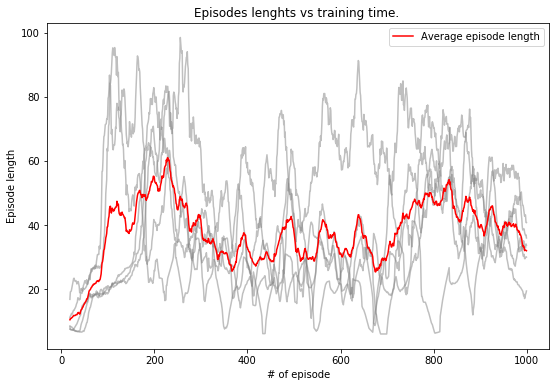

In [20]:
df_ep_ls = pd.read_csv("./experiment_n15_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n15_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
more_neurons_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 37.39
Time per simulation step in each experiment: [0.02500303 0.02500496 0.02420839 0.02466072 0.02487773] s
Mean time per simulation step: 0.025 s, std: 0.000 s
Total execution time: 2977.421 s for 120368 steps -> 0.025 s per step


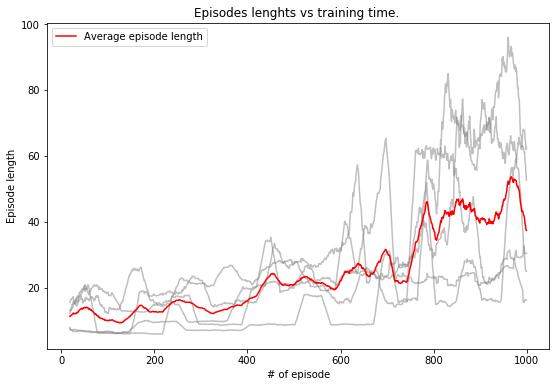

In [21]:
df_ep_ls = pd.read_csv("./experiment_n16_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n16_5_1000_10_1_85_0_0.05_1_-200_15_False_CS_exec_times.csv", header=None)
best1_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 41.20
Time per simulation step in each experiment: [0.0261575  0.02636251 0.0264952  0.0277824  0.03469369] s
Mean time per simulation step: 0.028 s, std: 0.003 s
Total execution time: 3032.120 s for 111835 steps -> 0.027 s per step


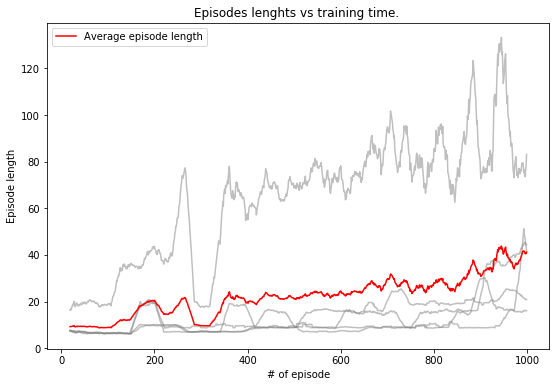

In [22]:
df_ep_ls = pd.read_csv("./experiment_n17_5_1000_10_1_85_0_0.05_1_-10_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n17_5_1000_10_1_85_0_0.05_1_-10_15_False_CS_exec_times.csv", header=None)
best2_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

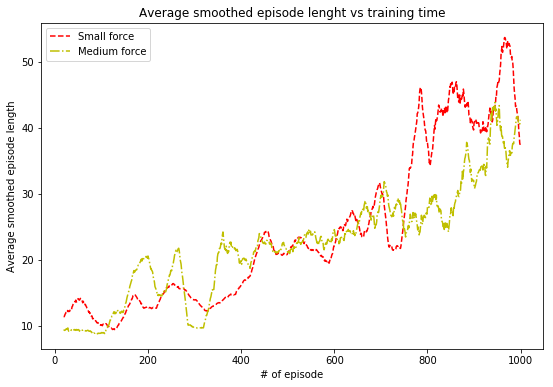

In [23]:
plt.plot(best1_smoothed, 'r--',label="Small force")
plt.plot(best2_smoothed, 'y-.', label="Medium force")
plt.title("Average smoothed episode lenght vs training time")
plt.xlabel("# of episode")
plt.ylabel("Average smoothed episode length")
plt.legend();

Last episode performance: 65.01
Time per simulation step in each experiment: [0.02905789 0.02754038 0.0240763  0.02477151 0.02745833] s
Mean time per simulation step: 0.027 s, std: 0.002 s
Total execution time: 4463.799 s for 169270 steps -> 0.026 s per step


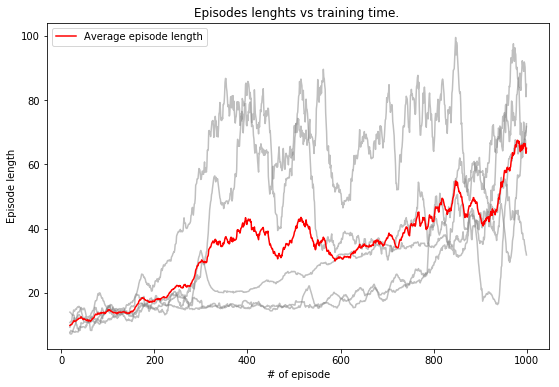

In [24]:
df_ep_ls = pd.read_csv("./experiment_n18_5_1000_10_1_85_0_0.05_1_-100_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n18_5_1000_10_1_85_0_0.05_1_-100_15_False_CS_exec_times.csv", header=None)
best3_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

Last episode performance: 69.54
Time per simulation step in each experiment: [0.0252166  0.02582149 0.02521028 0.02594443 0.02829773] s
Mean time per simulation step: 0.026 s, std: 0.001 s
Total execution time: 5080.656 s for 196335 steps -> 0.026 s per step


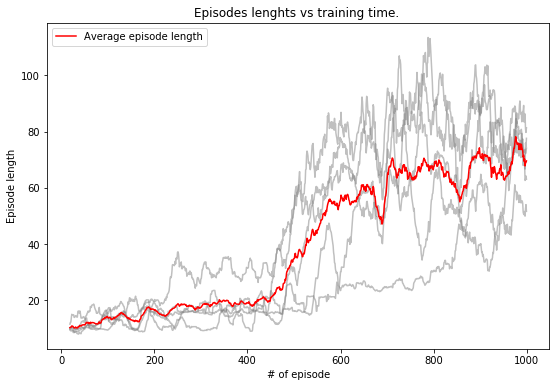

In [25]:
df_ep_ls = pd.read_csv("./experiment_n19_5_1000_10_1_85_0_0.05_1_-1_15_False_CS_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("./experiment_n19_5_1000_10_1_85_0_0.05_1_-1_15_False_CS_exec_times.csv", header=None)
best4_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)

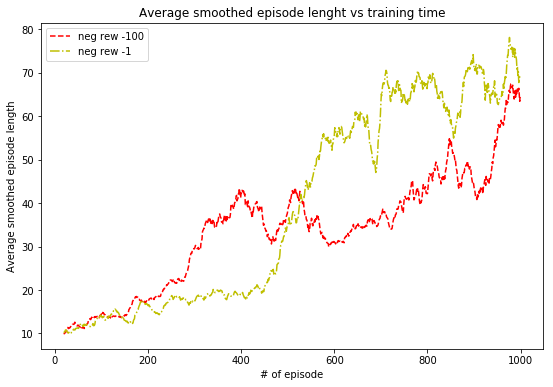

In [26]:
plt.plot(best3_smoothed, 'r--',label="neg rew -100")
plt.plot(best4_smoothed, 'y-.', label="neg rew -1")
plt.title("Average smoothed episode lenght vs training time")
plt.xlabel("# of episode")
plt.ylabel("Average smoothed episode length")
plt.legend();

## DQN 2

Last episode performance: 169.02
Time per simulation step in each experiment: [0.02397693 0.02422688 0.02298188 0.02389351 0.02375617] s
Mean time per simulation step: 0.024 s, std: 0.000 s
Total execution time: 11662.462 s for 490162 steps -> 0.024 s per step


(0, 300)

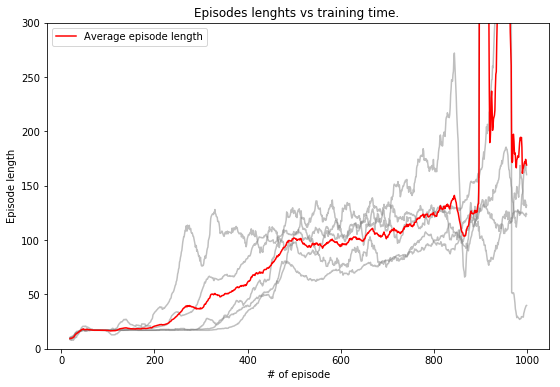

In [27]:
df_ep_ls = pd.read_csv("../dqn_2/experiment_dqn2_n1_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("../dqn_2/experiment_dqn2_n1_exec_times.csv", header=None)
best2_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)
ax = plt.gca()
ax.set_ylim([0, 300])

Last episode performance: 128.87
Time per simulation step in each experiment: [0.02481622 0.02392867 0.02643215 0.03070628 0.0273413 ] s
Mean time per simulation step: 0.027 s, std: 0.002 s
Total execution time: 10965.402 s for 414213 steps -> 0.026 s per step


(0, 300)

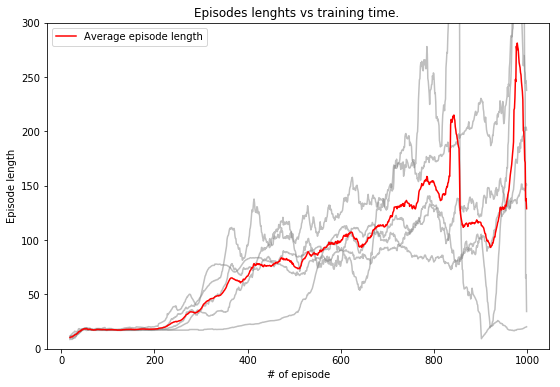

In [28]:
df_ep_ls = pd.read_csv("../dqn_2/experiment_dqn2_n2_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("../dqn_2/experiment_dqn2_n2_exec_times.csv", header=None)
best2_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)
ax = plt.gca()
ax.set_ylim([0, 300])

Last episode performance: 91.49
Time per simulation step in each experiment: [0.02257597 0.02302584 0.02538897 0.02695954 0.02375108] s
Mean time per simulation step: 0.024 s, std: 0.002 s
Total execution time: 7541.111 s for 309561 steps -> 0.024 s per step


(0, 300)

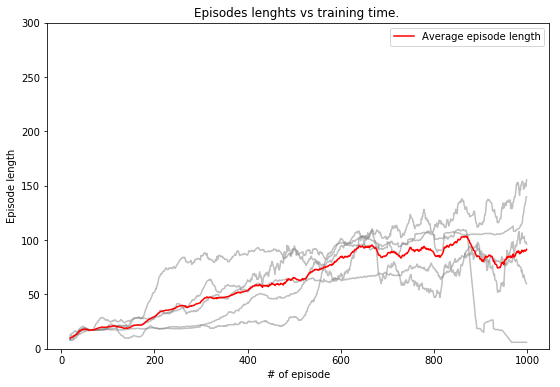

In [30]:
df_ep_ls = pd.read_csv("../dqn_2/experiment_dqn2_win_1_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("../dqn_2/experiment_dqn2_win_1_exec_times.csv", header=None)
best2_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)
ax = plt.gca()
ax.set_ylim([0, 300])

Last episode performance: 153.60
Time per simulation step in each experiment: [0.02428644 0.02398426 0.02403141 0.02410773 0.02425806] s
Mean time per simulation step: 0.024 s, std: 0.000 s
Total execution time: 12688.442 s for 525315 steps -> 0.024 s per step


(0, 300)

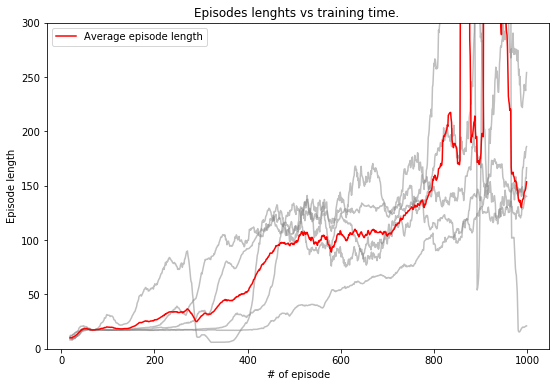

In [31]:
df_ep_ls = pd.read_csv("../dqn_2/experiment_dqn2_win_2_episodes_lengths.csv", header=None)
df_ex_ts = pd.read_csv("../dqn_2/experiment_dqn2_win_2_exec_times.csv", header=None)
best2_smoothed = plot_ep_lens(df_ep_ls, "")
print_exec_time_summary(df_ep_ls, df_ex_ts)
ax = plt.gca()
ax.set_ylim([0, 300])